In [1]:
from numpy import loadtxt
from pandas import read_csv
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [13]:
dataframe = read_csv('resources/websites.csv', delimiter=',', index_col=0)
dataframe = dataframe.groupby('https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html').sum()
dataframe

,13,15,14,1,1.1,387,4.1,275,5,89,...,479,3402031,39.1,458049,138,36064,13.1,97,70,40
https://edition.cnn.com/2021/09/06/asia/taliban-afghanistan-pregnant-policewoman-murder-intl/index.html,,,,,,,,,,,,,,,,,,,,,
https://edition.cnn.com/2021/09/06/americas/columbus-statue-indigenous-woman-mexico-city-cec/index.html,4,11,0,1,0,210,3,253,7,11,...,479,3548487,39,458831,134,41216,19,97,70,42
https://edition.cnn.com/2021/09/06/asia/tse-chi-lop-sunblock-intl-hnk-dst/index.html,61,88,27,1,1,445,4,294,12,87,...,489,3735402,28,398429,80,35992,51,86,70,65
https://edition.cnn.com/2021/09/06/entertainment/stanley-tucci-cancer/index.html,8,9,14,1,2,401,4,271,6,90,...,587,4748839,41,598947,163,54200,22,97,70,35
https://edition.cnn.com/2021/09/06/world/perseverance-rover-mars-sample-helicopter-scn/index.html,11,11,4,1,1,295,3,256,14,17,...,542,3988747,42,594764,156,36064,14,97,70,33
https://people.com/celebrity/star-tracks-wednesday-october-13-2021/,205,28,11,1,224,4003,3,1009,484,3023,...,135,21210098,103,354699,262,0,-122,59,100,-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.wsj.com/articles/jpmorgan-profit-jumps-on-reserve-release-11634123662?mod=hp_lista_pos2,8,7,0,1,6,283,7,85,17,73,...,33,3679099,44,171051,142,126579,50,97,100,49
https://www.wsj.com/articles/l-a-port-to-operate-around-the-clock-to-ease-cargo-logjams-white-house-says-11634115601?mod=hp_lead_pos4,7,4,1,1,6,334,9,81,18,74,...,34,4065735,44,177276,147,126579,46,96,100,45
https://www.wsj.com/articles/netflix-employee-group-calls-for-walkout-amid-tensions-over-dave-chappelle-show-11634169211?mod=hp_featst_pos3,6,5,0,1,6,332,9,83,18,76,...,34,4473007,46,277849,155,126579,43,96,100,44


In [20]:
fake = pd.read_csv('resources/training_data/not_that_legit.txt', names=["name"])
true = pd.read_csv('resources/training_data/legit.txt', names=["name"])
fake['label'] = 1
true['label'] = 0
fake = fake.append(true)
fake = fake.sort_values(by=['name'], ignore_index=True)
fake = fake.iloc[22:].reset_index()
labels = fake['label']
labels

0      1
1      1
2      1
3      1
4      1
      ..
148    0
149    0
150    0
151    0
152    0
Name: label, Length: 153, dtype: int64

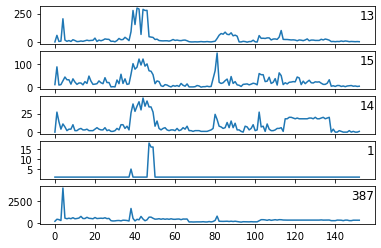

In [21]:
dataset = dataframe.values
groups = [0, 1, 2, 3, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(dataset[:, group])
    pyplot.title(dataframe.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [22]:
from numpy import unique
from numpy import argmax
from pandas import read_csv
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [23]:
df = dataframe.copy()
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.describe()
dataset = normalized_df.values

In [25]:
X, y = dataset[:,:39], labels
n_features = X.shape

y = LabelEncoder().fit_transform(y)
n_class = len(unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# definiowanie modeli
model = Sequential()
model.add(Embedding(10000,64,input_length = 39))
model.add(LSTM(units = 256, return_sequences=True))
model.add(LSTM(units=256))
model.add(Dropout(0.35))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.35))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(units=10,activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam())
# dopasowanie
history = model.fit(X_train, y_train, epochs=150, batch_size=95)

yhat = model.predict(X_test)
yhat = argmax(yhat, axis=-1).astype('int')
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Epoch 1/150
2/2 [==============================] - 3s 84ms/step - loss: 2.3033
Epoch 2/150
2/2 [==============================] - 0s 83ms/step - loss: 2.1717
Epoch 3/150
2/2 [==============================] - 0s 84ms/step - loss: 1.4059
Epoch 4/150
2/2 [==============================] - 0s 88ms/step - loss: 0.9511
Epoch 5/150
2/2 [==============================] - 0s 88ms/step - loss: 0.7229
Epoch 6/150
2/2 [==============================] - 0s 100ms/step - loss: 0.9126
Epoch 7/150
2/2 [==============================] - 0s 84ms/step - loss: 0.6783
Epoch 8/150
2/2 [==============================] - 0s 85ms/step - loss: 0.7423
Epoch 9/150
2/2 [==============================] - 0s 87ms/step - loss: 0.7009
Epoch 10/150
2/2 [==============================] - 0s 86ms/step - loss: 0.6862
Epoch 11/150
2/2 [==============================] - 0s 89ms/step - loss: 0.7101
Epoch 12/150
2/2 [==============================] - 0s 85ms/step - loss: 0.7510
Epoch 13/150
2/2 [==============================

2/2 [==============================] - 0s 111ms/step - loss: 0.6701
Epoch 103/150
2/2 [==============================] - 0s 100ms/step - loss: 0.6427
Epoch 104/150
2/2 [==============================] - 0s 159ms/step - loss: 0.6637
Epoch 105/150
2/2 [==============================] - 0s 127ms/step - loss: 0.6769
Epoch 106/150
2/2 [==============================] - 0s 99ms/step - loss: 0.6807
Epoch 107/150
2/2 [==============================] - 0s 100ms/step - loss: 0.6699
Epoch 108/150
2/2 [==============================] - 0s 129ms/step - loss: 0.7009
Epoch 109/150
2/2 [==============================] - 0s 123ms/step - loss: 0.6958
Epoch 110/150
2/2 [==============================] - 0s 115ms/step - loss: 0.6852
Epoch 111/150
2/2 [==============================] - 0s 136ms/step - loss: 0.6578
Epoch 112/150
2/2 [==============================] - 0s 113ms/step - loss: 0.6409
Epoch 113/150
2/2 [==============================] - 0s 123ms/step - loss: 0.6326
Epoch 114/150
2/2 [============

KeyError: 'val_loss'

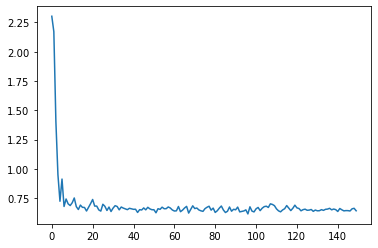

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[38, 13],
       [26, 24]], dtype=int64)

In [55]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 39, 64)            640000    
_________________________________________________________________
lstm_45 (LSTM)               (None, 39, 256)           328704    
_________________________________________________________________
lstm_46 (LSTM)               (None, 256)               525312    
Total params: 1,494,016
Trainable params: 1,494,016
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras_tuner.tuners import RandomSearch

In [54]:
def build_model(hp):
    model = keras.Sequential()
    #model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=128), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-4])),
                loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [72]:
from tensorflow import keras
from tensorflow.keras import layers
tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 30,
    executions_per_trial = 1,
)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [73]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [68]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.01
Score: 0.6078431606292725
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 0.5882353186607361
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.01
Score: 0.5882353186607361
Trial summary
Hyperparameters:
units: 288
learning_rate: 0.0001
Score: 0.3921568791071574
Trial summary
Hyperparameters:
units: 416
learning_rate: 0.0001
Score: 0.1960784395535787
Trial summary
Hyperparameters:
units: 160
learning_rate: 0.0001
Score: 0.0


In [74]:
def build_model2(hp):
  model = tf.keras.Sequential()
  #model.add(layers.Flatten(input_shape=(28,28)))
  for i in range(hp.Int('layers', 2, 6)):
    model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), 50, 100, step=10),
                                    activation=hp.Choice('act_' + str(i), ['relu', 'sigmoid'])))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [75]:
tuner2 = RandomSearch(
    build_model2,
    objective = 'val_accuracy',
    max_trials = 4,
    executions_per_trial = 1,
    directory = '/content/sample_data'   
)

INFO:tensorflow:Reloading Oracle from existing project /content/sample_data\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from /content/sample_data\untitled_project\tuner0.json


In [76]:
tuner2.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [77]:
tuner2.results_summary()

Results summary
Results in /content/sample_data\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
layers: 5
units_0: 60
act_0: sigmoid
units_1: 70
act_1: relu
units_2: 60
act_2: relu
units_3: 60
act_3: sigmoid
units_4: 80
act_4: sigmoid
units_5: 80
act_5: sigmoid
Score: 0.5882353186607361
Trial summary
Hyperparameters:
layers: 6
units_0: 70
act_0: sigmoid
units_1: 50
act_1: sigmoid
units_2: 50
act_2: relu
units_3: 50
act_3: relu
units_4: 50
act_4: relu
units_5: 50
act_5: relu
Score: 0.5882353186607361
Trial summary
Hyperparameters:
layers: 4
units_0: 80
act_0: relu
units_1: 60
act_1: sigmoid
units_2: 90
act_2: relu
units_3: 80
act_3: relu
units_4: 60
act_4: sigmoid
units_5: 90
act_5: relu
Score: 0.5882353186607361
Trial summary
Hyperparameters:
layers: 2
units_0: 50
act_0: relu
units_1: 80
act_1: relu
units_2: 60
act_2: relu
units_3: 70
act_3: sigmoid
units_4: 60
act_4: sigmoid
units_5: 100
act_5: sigmoid
Score: 0.588